# Maximum Likelihood Estimation (MLE) and Maximum a Posteriori (MAP)

## Let the user fix a positive integer K > 0, and define Theta_true = (1, 1, ..., 1).T

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import isnan

def vander(X,k):
    A = np.array([X**i for i in range(k)])
    return A.T

def sigmoid(X,w):
    return 1/(1+np.exp(-X@w))

def MLE(X,Y,k,method='Normal',tolf=0.01,tolx=0.01,itmax=1000,batch_size=10):
    Phi = vander(X,k)
    if method == 'GD':
        Theta = np.random.randint(2, size=k).reshape(k,1)
        Thetaprev = Theta + tolx + 1
        it=0
        grad_f = 2*Phi.T@(Phi@Theta-Y.reshape(Y.size,1))
        norm_grad = np.array([np.linalg.norm(grad_f)])
        while (np.linalg.norm(Theta-Thetaprev)>tolx) and (norm_grad>tolf) and (it<itmax):
            alpha = 0.001       #qui va scritto alpha cazzo
            Thetaprev=Theta
            Theta = Theta - alpha*grad_f
            it+=1
            grad_f = 2*Phi.T@(Phi@Theta-Y.reshape(Y.size,1))
            norm_grad = np.array([np.linalg.norm(grad_f)])

    elif method =='SGD':
        N,d = np.shape(Phi)
        Theta = np.ones((k,1))*1e-5
        alpha = 0.01         #alpha anche qui
        n_batch_per_epoch = N//batch_size

        for epoch in range(itmax):
            ind = np.arange(N)
            np.random.shuffle(ind)
            for i in range(n_batch_per_epoch):
                try:
                    Mx = Phi[ind[(i*batch_size):((1+i)*batch_size)],:]
                    My = Y[ind[(i*batch_size):((1+i)*batch_size)]]
                except IndexError:
                    Mx = Phi[ind[(i*batch_size):],:]
                    My = Y[ind[(i*batch_size):]]
                
                Theta = Theta-alpha*(Mx.T@(Mx@Theta-My.reshape(My.size,1)))

    else:
        Theta = np.linalg.solve(Phi.T@Phi,Phi.T@Y) #substitute with Cholesky dec
    return Theta

def MAP(X,Y,k,lmbda,method='Normal',tolf=0.01,tolx=0.01,itmax=1000,batch_size=10):
    Phi = vander(X,k)
    if method == 'GD':
        Theta = np.random.randint(2, size=k).reshape(k,1)
        Thetaprev = Theta + tolx + 1
        it=0
        grad_f = 2*Phi.T@(Phi@Theta-Y.reshape(Y.size,1))+lmbda*Theta
        norm_grad = np.array([np.linalg.norm(grad_f)])
        while (np.linalg.norm(Theta-Thetaprev)>tolx) and (norm_grad>tolf) and (it<itmax):
            alpha = 0.001       #qui va scritto alpha cazzo
            Thetaprev=Theta
            Theta = Theta - alpha*grad_f
            it+=1
            grad_f = 2*Phi.T@(Phi@Theta-Y.reshape(Y.size,1))
            norm_grad = np.array([np.linalg.norm(grad_f)])

    elif method =='SGD':
        N,d = np.shape(Phi)
        Theta = np.ones((k,1))*1e-5
        alpha = 0.01       #alpha anche qui
        n_batch_per_epoch = N//batch_size

        for epoch in range(itmax):
            ind = np.arange(N)
            np.random.shuffle(ind)
            for i in range(n_batch_per_epoch):
                try:
                    Mx = Phi[ind[(i*batch_size):((1+i)*batch_size)],:]
                    My = Y[ind[(i*batch_size):((1+i)*batch_size)]]
                except IndexError:
                    Mx = Phi[ind[(i*batch_size):],:]
                    My = Y[ind[(i*batch_size):]]
                
                Theta = Theta-alpha*(Mx.T@(Mx@Theta-My.reshape(My.size,1))+lmbda*Theta)

    else:
        Theta = np.linalg.solve(Phi.T@Phi+lmbda/2*np.eye(k),Phi.T@Y) #substitute with Cholesky dec
    return Theta


def Err(theta_true,theta):
    t=theta.reshape((theta.size,))
    k_true = theta_true.shape
    k = t.shape
    if k>k_true:
        theta_true = np.concatenate((theta_true,np.zeros((k[0]-k_true[0],))))
    elif k<k_true:
        theta = np.concatenate((theta,np.zeros((k_true[0]-k[0],))))
    return np.linalg.norm(theta_true-theta)/np.linalg.norm(theta_true)

def backtracking(f,grad_f,x):
    alpha = 0.5
    c = 0.8
    tau = 0.5

    while f(x-alpha*grad_f(x))>f(x) - c*alpha*np.linalg.norm((grad_f(x)))**2:
        alpha = alpha*tau

        if alpha < 1e-3:
            break
    return alpha



## Define an input dataset
### Given a set of functions Phi1, Phi2, ..., PhiK, define the Generalized Vandermonde matrix
### Given a variance sigma^2 > 0, compute Y = PHI(X)@Theta_true + e

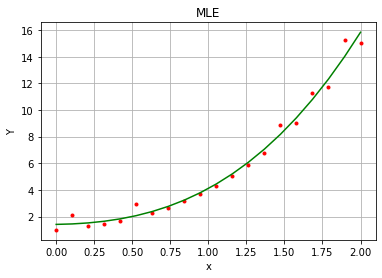

[1.41434218 0.15887963 1.54904175 0.9883425 ]


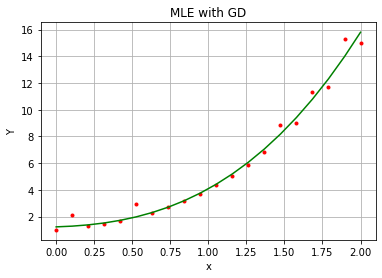

[[1.22860359]
 [0.33756269]
 [1.55639837]
 [0.95916988]]


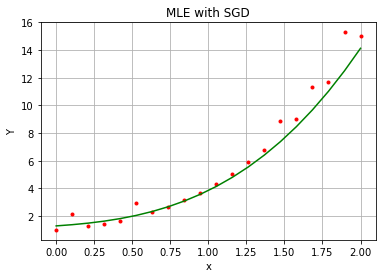

[[1.29076337]
 [0.73258532]
 [0.80951822]
 [1.01660994]]


In [4]:
a = int(input('Define the initial value a of the interval [a,b]:'))
b = int(input('Define the ending value b of the interval [a,b]'))
N = int(input('Define the number N of samples:'))
K = int(input('Define the degree K of the funcion:'))
theta_true=np.ones((K,))

X = np.linspace(a,b,N)
Y = vander(X,K)@theta_true
sigma = float(input('Define sigma^2 of the error e:'))
mode= str(input("Define the distribution"))
if mode=='':
    Y = Y + np.random.normal(0,sigma,Y.shape)
else:
    Y = Y + np.random.poisson(sigma,Y.shape) 
Theta = MLE(X,Y,K)
#Plot
plt.plot(X,Y,'.',c='red')
plt.plot(X,vander(X,K)@Theta,c='green')
plt.title('MLE')
plt.xlabel('x')
plt.ylabel('Y')
plt.grid()
plt.show()

print(Theta)


Theta = MLE(X,Y,K,'GD')
#Plot
plt.plot(X,Y,'.',c='red')
plt.plot(X,vander(X,K)@Theta,c='green')
plt.title('MLE with GD')
plt.xlabel('x')
plt.ylabel('Y')
plt.grid()
plt.show()

print(Theta)

Theta = MLE(X,Y,K,'SGD',itmax=150,batch_size=N//2)
#Plot
plt.plot(X,Y,'.',c='red')
plt.plot(X,vander(X,K)@Theta,c='green')
plt.title('MLE with SGD')
plt.xlabel('x')
plt.ylabel('Y')
plt.grid()
plt.show()

print(Theta)

In [5]:
def Test(Xt,Yt,theta):
    N = Xt.shape[0]
    k = theta.shape[0]
    Phi = vander(Xt,k)
    e = 1/N*(np.linalg.norm(Phi@theta - Yt))**2
    return e

## Pretend not to know the correct value of K. The first task is to try to guess it and use it to approximate the true solution Theta_true by MLE and MAP

### For different values of K, plot the training datapoints and the test datapoints with different colors, and visualize (as a continuous line) the learnt regression model fθMLE (x)

(4, 1)


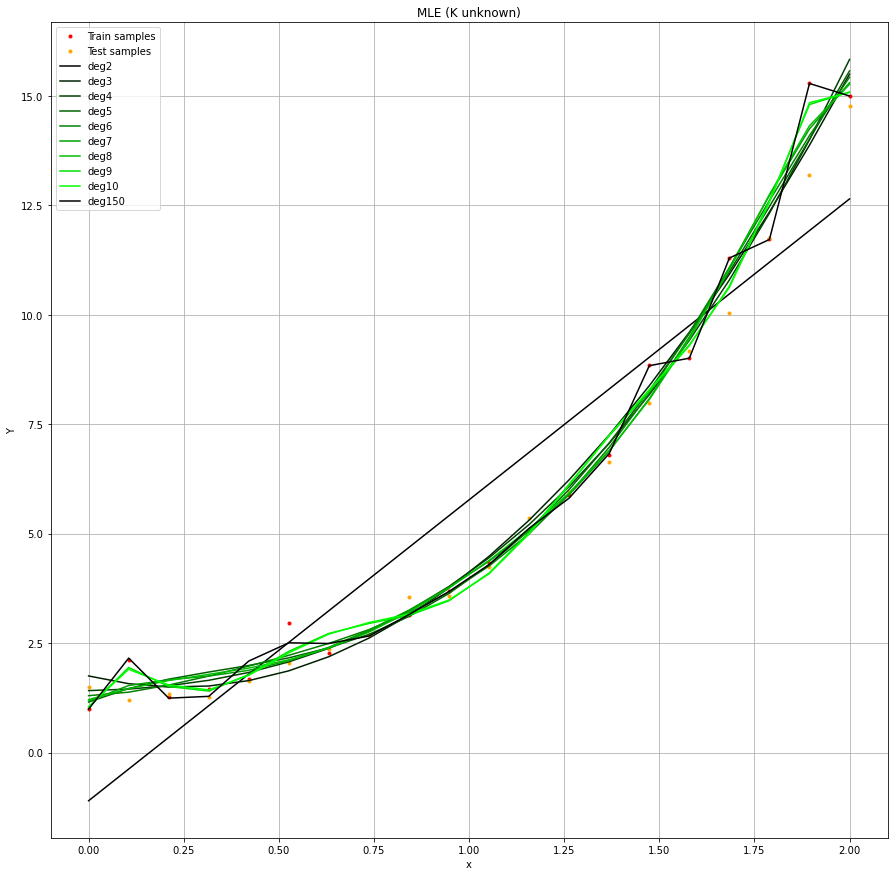

In [6]:
deg = [i for i in range(2,11)]
e_test_MLE=[]
e_train_MLE=[]
Xtest = np.linspace(a,b,N)
Ytest = vander(Xtest,K)@theta_true
if mode=='n':
    Ytest = Ytest + np.random.normal(0,sigma,Y.shape)
else:
    Ytest = Ytest + np.random.poisson(sigma,Y.shape) 
print(Theta.shape)

plt.figure(figsize=[15,15])
plt.plot(X,Y,'.',c='red',label='Train samples')
plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
for i in deg:
    Theta = MLE(X,Y,i,'Normal')
    Phi = vander(X,i)
    e_test_MLE.append(Test(Xtest,Ytest,Theta))
    e_train_MLE.append(Test(X,Y,Theta))
    plt.plot(X,Phi@Theta,c=(0,i/(deg[-1]-deg[0])-deg[0]/(deg[-1]-deg[0]),0,1),label='deg'+str(i))
Theta = MLE(X,Y,150,'Normal')
Phi = vander(X,150)
e_test_MLE.append(Test(Xtest,Ytest,Theta))
e_train_MLE.append(Test(X,Y,Theta))
plt.plot(X,Phi@Theta,c='black',label='deg'+str(150))
plt.title('MLE (K unknown)')
plt.xlabel('x')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

deg.append(150)

### For increasing values of K, use the functions defined above to compute the training and test error

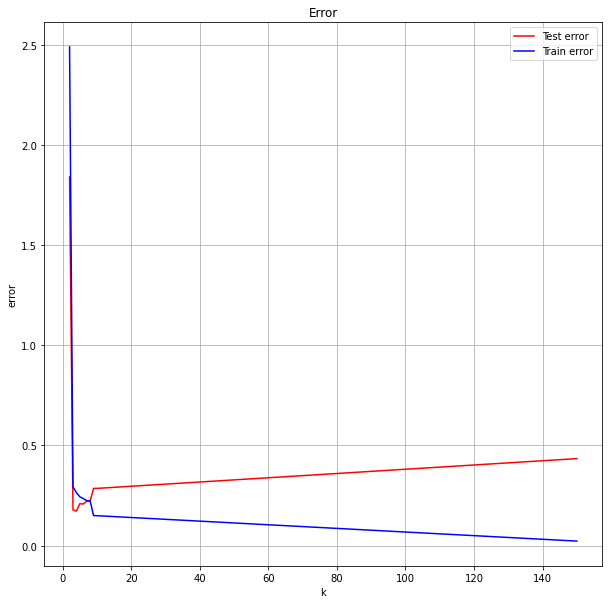

In [7]:
plt.figure(figsize=[10,10])
plt.plot(deg,e_test_MLE,'-',c='red',label='Test error')
plt.plot(deg,e_train_MLE,'-',c='blue',label='Train error')
plt.title('Error')
plt.xlabel('k')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()

### Write a function that takes as input the training data D = (X, Y ), K and λ > 0 and returns the MAP solution (with Gaussian assumption) θMAP ∈ R K for that problem. 

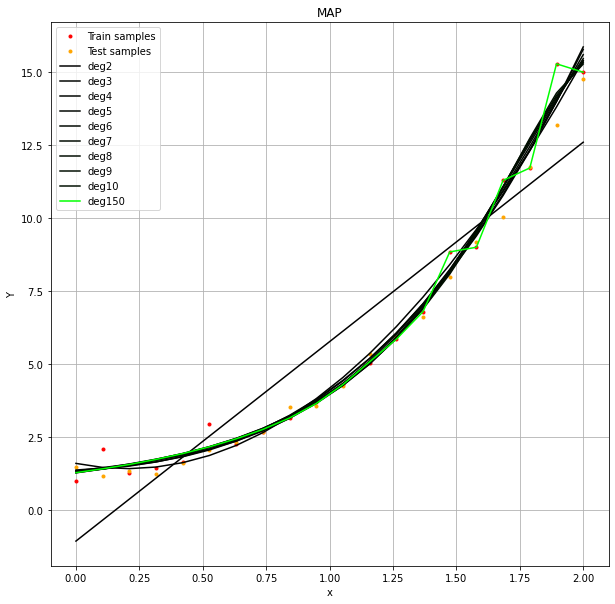

In [8]:
e_test_MAP=[]
e_train_MAP=[]

plt.figure(figsize=[10,10])
plt.plot(X,Y,'.',c='red',label='Train samples')
plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
for i in deg:
    Theta = MAP(X,Y,i,sigma**2)
    Phi = vander(X,i)
    e_test_MAP.append(Test(Xtest,Ytest,Theta))
    e_train_MAP.append(Test(X,Y,Theta))
    plt.plot(X,Phi@Theta,c=(0,i/(deg[-1]-deg[0])-deg[0]/(deg[-1]-deg[0]),0,1),label='deg'+str(i))
plt.title('MAP')
plt.xlabel('x')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

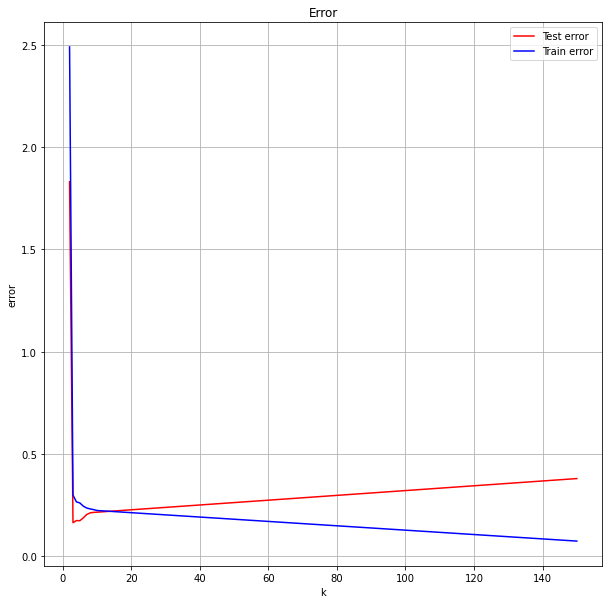

In [9]:
plt.figure(figsize=[10,10])
plt.plot(deg,e_test_MAP,'-',c='red',label='Test error')
plt.plot(deg,e_train_MAP,'-',c='blue',label='Train error')
plt.title('Error')
plt.xlabel('k')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()

### For K lower, equal and greater than the correct degree of the test polynomial, plot the training datapoints and the test datapoints with different colors, and visualize (as a continuous line) the learnt regression model fθMAP (x) with different values of λ.

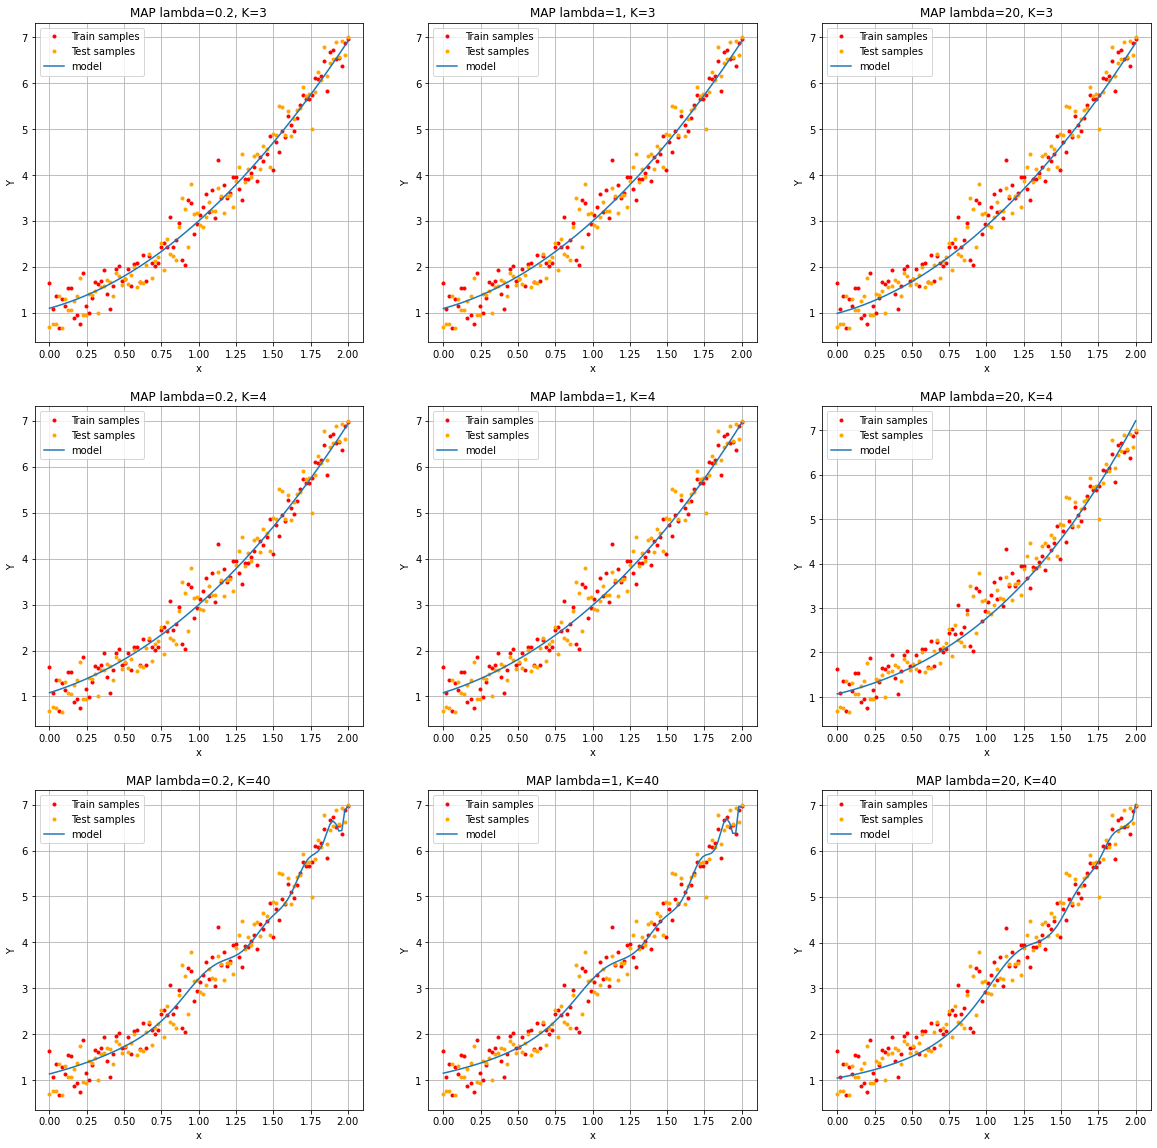

In [211]:
e_test_MAP_l1=[]
e_train_MAP_l1=[]
LAMBDA = [0.2,1,20]
K= [3,4,40]

plt.figure(figsize=[20,20])
for c in range(9):
    plt.subplot(3,3,c+1)
    plt.plot(X,Y,'.',c='red',label='Train samples')
    plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
    Theta = MAP(X,Y,K[c//len(K)],LAMBDA[c%len(LAMBDA)])
    Phi = vander(X,K[c//len(K)])
    e_test_MAP_l1.append(Test(Xtest,Ytest,Theta))
    e_train_MAP_l1.append(Test(X,Y,Theta))
    plt.plot(X,Phi@Theta,label='model')
    plt.title('MAP lambda='+str(LAMBDA[c%len(LAMBDA)])+', K='+str(K[c//len(K)]))
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
plt.show()

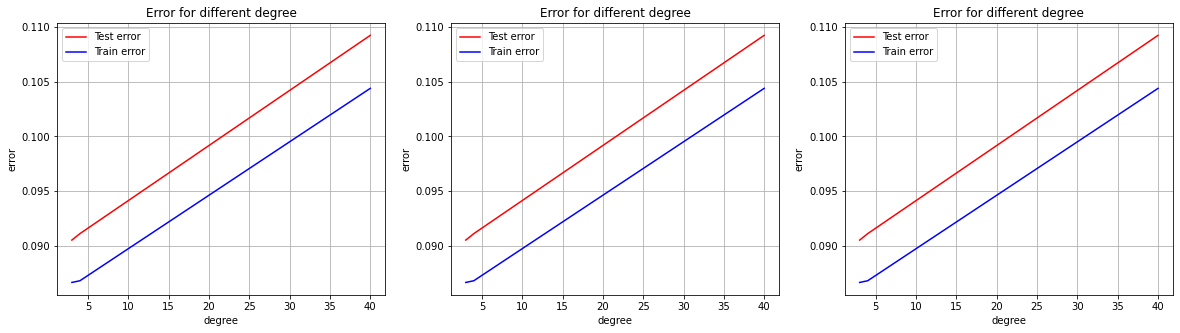

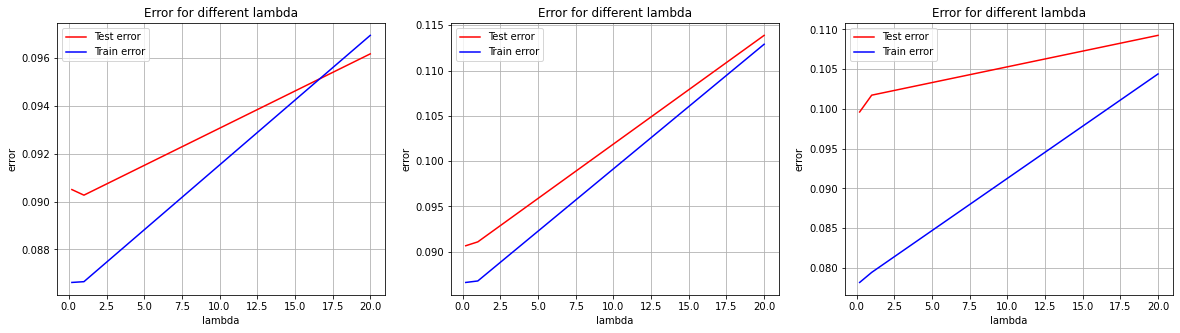

In [212]:
plt.figure(figsize=[20,5])
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.plot(K,[e_test_MAP_l1[u+u*len(LAMBDA)] for u in range(len(LAMBDA))],'-',c='red',label='Test error')
    plt.plot(K,[e_train_MAP_l1[u+u*len(LAMBDA)] for u in range(len(LAMBDA))],'-',c='blue',label='Train error')
    plt.title('Error for different degree')
    plt.xlabel('degree')
    plt.ylabel('error')
    plt.grid()
    plt.legend()
plt.show()

plt.figure(figsize=[20,5])
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.plot(LAMBDA,e_test_MAP_l1[c*len(LAMBDA):c*len(LAMBDA)+len(LAMBDA)],'-',c='red',label='Test error')
    plt.plot(LAMBDA,e_train_MAP_l1[c*len(LAMBDA):c*len(LAMBDA)+len(LAMBDA)],'-',c='blue',label='Train error')
    plt.title('Error for different lambda')
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.grid()
    plt.legend()
plt.show()

### For K being way greater than the correct degree of the polynomial, compute the MLE and MAP solution. Compare the test error of the two, for different values of λ (in the case of MAP).

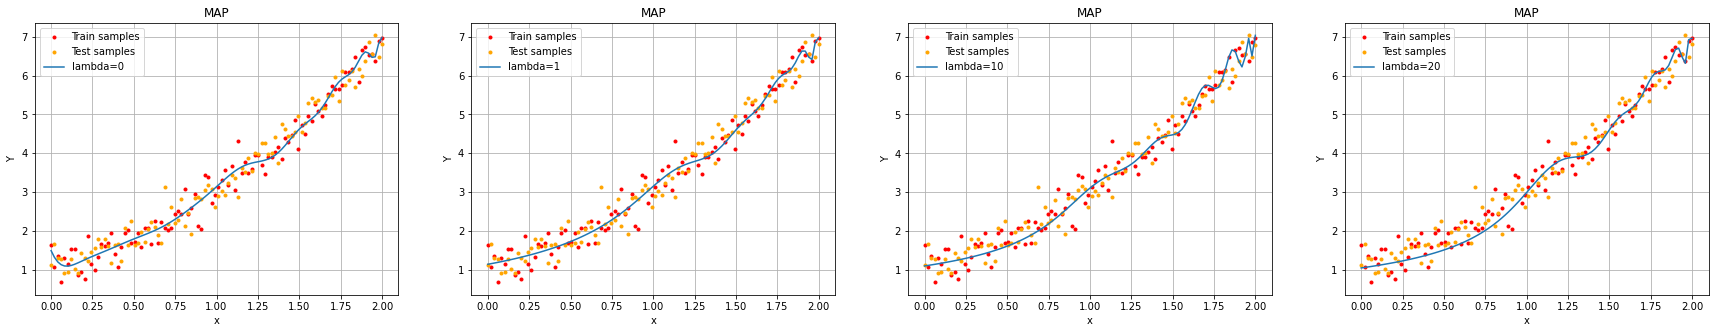

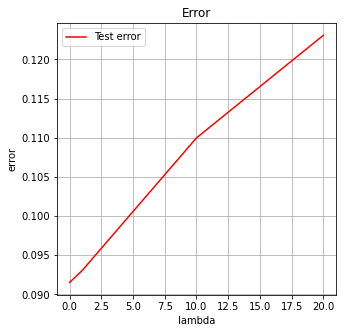

In [204]:
error_test_MAP=[]
LAMBDA=[0,1,10,20]

plt.figure(figsize=[30,5])
for c in range(4):
    plt.subplot(1,4,c+1)
    plt.plot(X,Y,'.',c='red',label='Train samples')
    plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
    Theta = MAP(X,Y,50,LAMBDA[c])
    Phi = vander(X,50)
    error_test_MAP.append(Test(Xtest,Ytest,Theta))
    plt.plot(X,Phi@Theta,label='lambda='+str(LAMBDA[c]))
    plt.title('MAP')
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
plt.show()


plt.figure(figsize=[5,5])
plt.plot(LAMBDA,error_test_MAP,'-',c='red',label='Test error')
plt.title('Error')
plt.xlabel('lambda')
plt.ylabel('error')
plt.grid()
plt.legend()
plt.show()

### • For K greater than the true degree of the polynomial, define Err(θ) = ||θ−θtrue||2/||θtrue||2 where θtrue has been padded with zeros to match the shape of θ. Compute Err(θMLE) and Err(θMAP ) for increasing values of K and different values of λ.

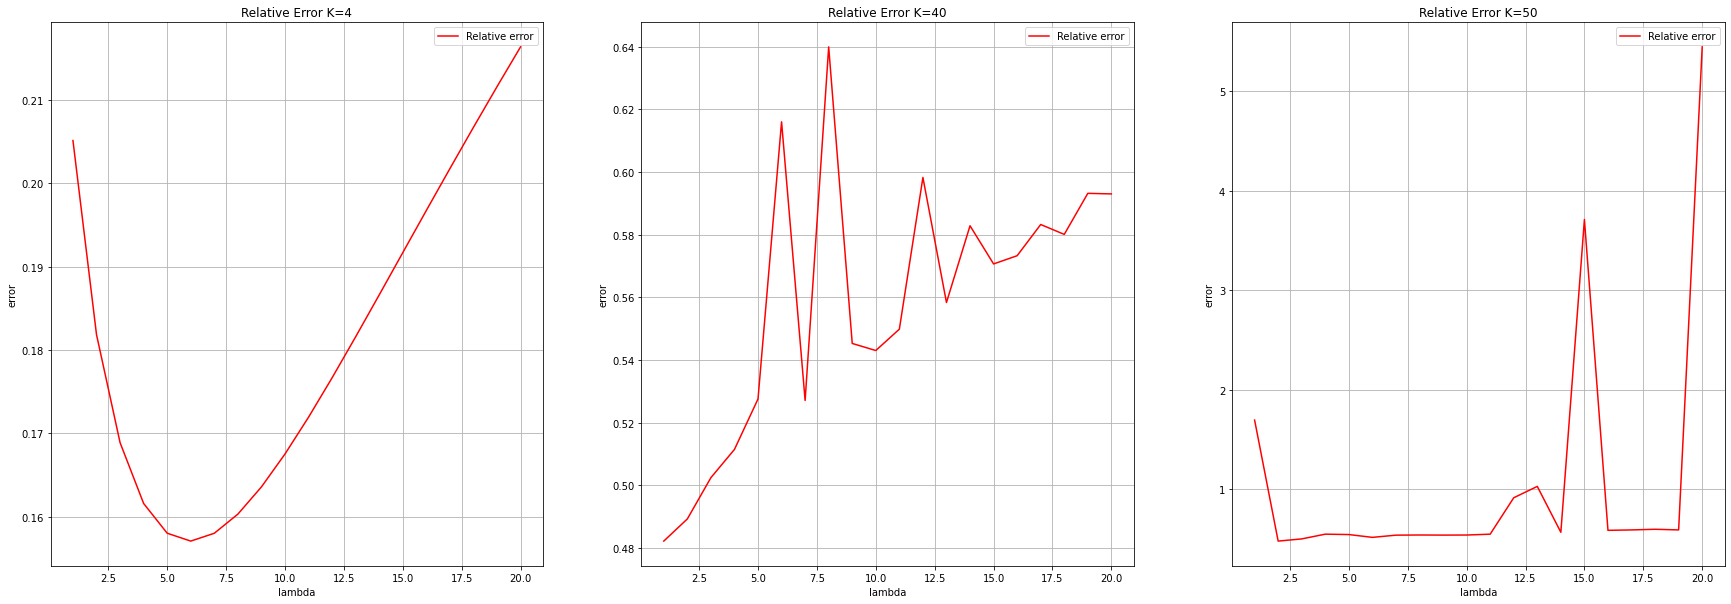

In [11]:
e_test_MAP_l1=[]
e_train_MAP_l1=[]
e_test_MAP_l2=[]
e_train_MAP_l2=[]
e_test_MAP_l3=[]
e_train_MAP_l3=[]
LAMBDA = [i for i in range(1,21)]
K=[4,40,50]

plt.figure(figsize=[30,10])
for i in range(len(K)):
    plt.subplot(1,3,i+1)
    for c in range(len(LAMBDA)):
        Theta = MAP(X,Y,K[i],LAMBDA[c%len(LAMBDA)])
        Phi = vander(X,K[i])
        if i==0:
            e_test_MAP_l1.append(Err(theta_true,Theta))
        elif i==1:
            e_test_MAP_l2.append(Err(theta_true,Theta))
        else:
            e_test_MAP_l3.append(Err(theta_true,Theta))
    if i==0:
        plt.title('Relative Error K='+str(K[i]))
        plt.plot(LAMBDA,e_test_MAP_l1,'-',c='red',label='Relative error')
        plt.xlabel('lambda')
        plt.ylabel('error')
        plt.grid()
        plt.legend()
    elif i==1:
        plt.title('Relative Error K='+str(K[i]))
        plt.plot(LAMBDA,e_test_MAP_l2,'-',c='red',label='Relative error')
        plt.xlabel('lambda')
        plt.ylabel('error')
        plt.grid()
        plt.legend()
    else:
        plt.title('Relative Error K='+str(K[i]))
        plt.plot(LAMBDA,e_test_MAP_l3,'-',c='red',label='Relative error')
        plt.xlabel('lambda')
        plt.ylabel('error')
        plt.grid()
        plt.legend()
plt.show()

### Compare the results obtained by increasing the number N of datapoints

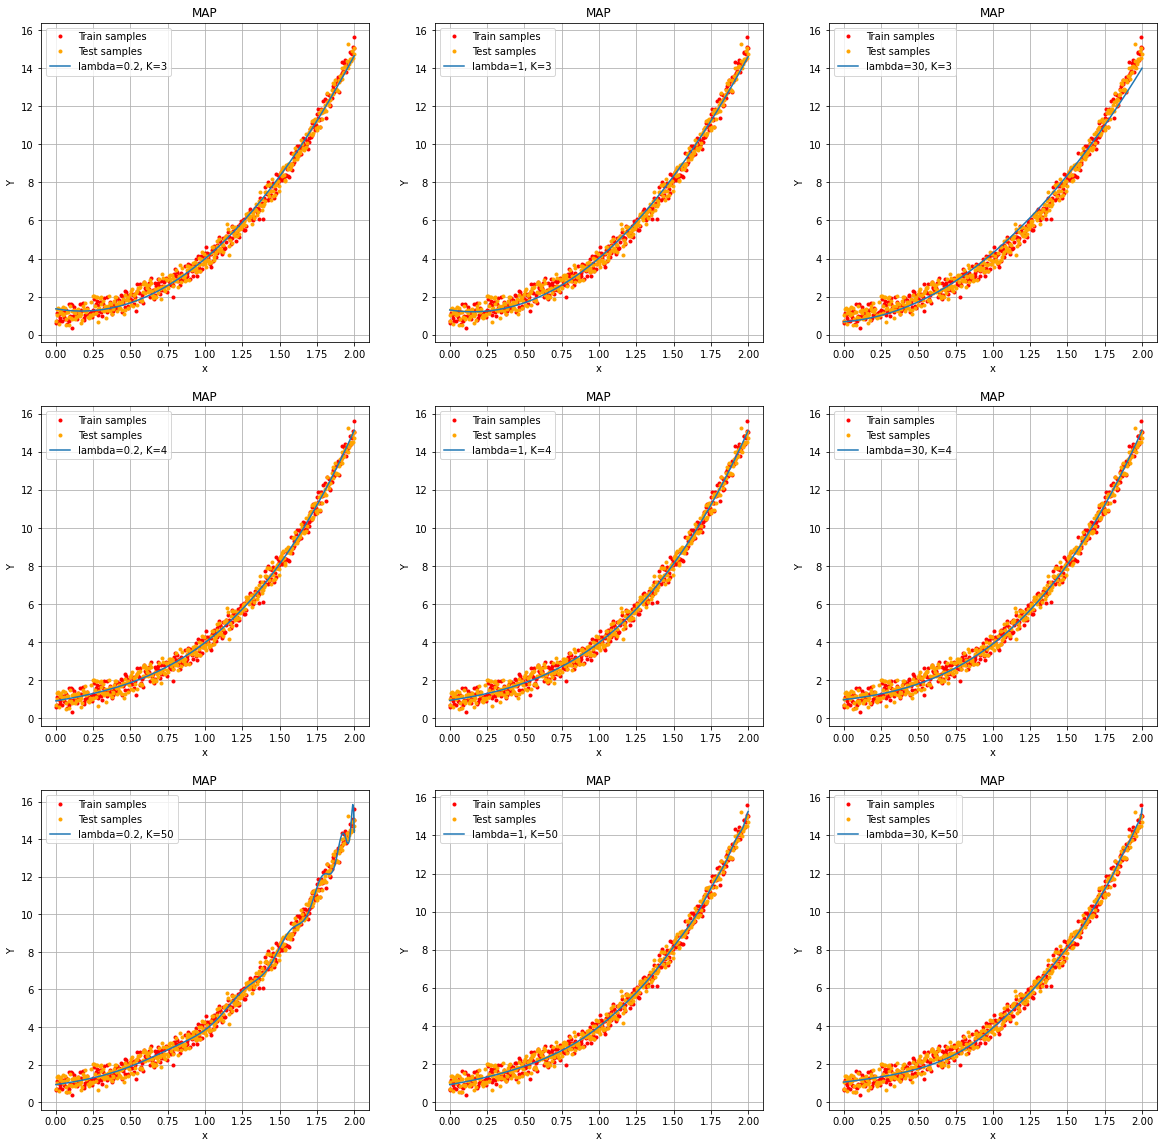

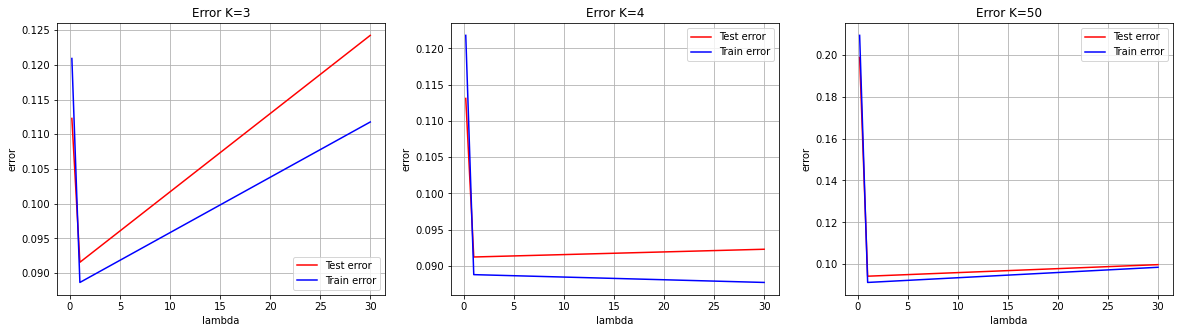

In [201]:
a=0
b=2
N=400
K=4
sigma=0.3
theta_true=np.ones((K,))
X = np.linspace(a,b,N)
Y = vander(X,K)@theta_true
#sigma = float(input('Define sigma^2 of the error e:'))
if mode=='n':
    Y = Y + np.random.normal(0,sigma,Y.shape)
else:
    Y = Y + np.random.poisson(sigma,Y.shape) 

Xtest = np.linspace(a,b,N)
Ytest = vander(Xtest,K)@theta_true
Ytest = Ytest + np.random.normal(0,sigma,Ytest.shape)

e_test_MAP_l1=[]
e_train_MAP_l1=[]
e_test_MAP_l2=[]
e_train_MAP_l2=[]
e_test_MAP_l3=[]
e_train_MAP_l3=[]
LAMBDA = [0.2,1,30]
K= [3,4,50]

plt.figure(figsize=[20,20])
for c in range(9):
    plt.subplot(3,3,c+1)
    plt.plot(X,Y,'.',c='red',label='Train samples')
    plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
    Theta = MAP(X,Y,K[c//len(K)],LAMBDA[c%len(LAMBDA)])
    Phi = vander(X,K[c//len(K)])
    if c%len(LAMBDA)==0:
        e_test_MAP_l1.append(Test(Xtest,Ytest,Theta))
        e_train_MAP_l1.append(Test(X,Y,Theta))
    elif c%len(LAMBDA)==1:
        e_test_MAP_l2.append(Test(Xtest,Ytest,Theta))
        e_train_MAP_l2.append(Test(X,Y,Theta))
    elif c%len(LAMBDA)==2:
        e_test_MAP_l3.append(Test(Xtest,Ytest,Theta))
        e_train_MAP_l3.append(Test(X,Y,Theta))
    plt.plot(X,Phi@Theta,label='lambda='+str(LAMBDA[c%len(LAMBDA)])+', K='+str(K[c//len(K)]))
    plt.title('MAP')
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
plt.show()

plt.figure(figsize=[20,5])
for c in range(3):
    plt.subplot(1,3,c+1)
    if c==0:
        plt.plot(LAMBDA,e_test_MAP_l1,'-',c='red',label='Test error')
        plt.plot(LAMBDA,e_train_MAP_l1,'-',c='blue',label='Train error')
        plt.title('Error K='+str(K[0]))
    elif c==1:
        plt.plot(LAMBDA,e_test_MAP_l2,'-',c='red',label='Test error')
        plt.plot(LAMBDA,e_train_MAP_l2,'-',c='blue',label='Train error')
        plt.title('Error K='+str(K[1]))
    else:
        plt.plot(LAMBDA,e_test_MAP_l3,'-',c='red',label='Test error')
        plt.plot(LAMBDA,e_train_MAP_l3,'-',c='blue',label='Train error')
        plt.title('Error K='+str(K[2]))
    plt.xlabel('lambda')
    plt.ylabel('error')
    plt.grid()
    plt.legend()
plt.show()

### Compare the results obtained by the three algorithms GD, SGD and Normal Equations

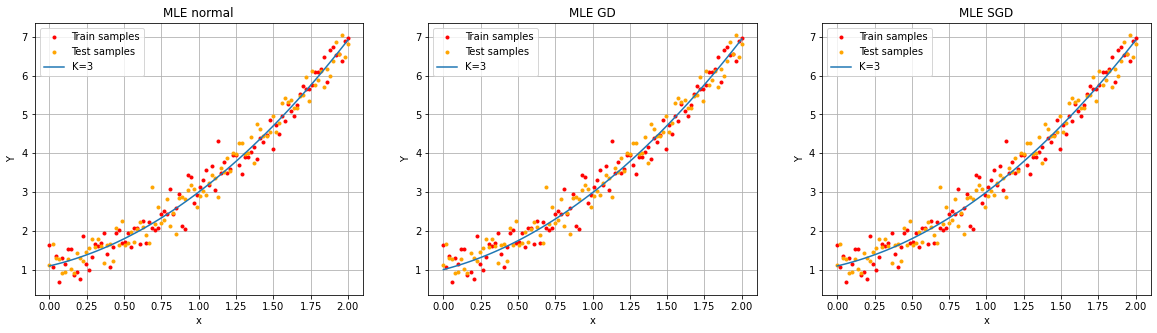

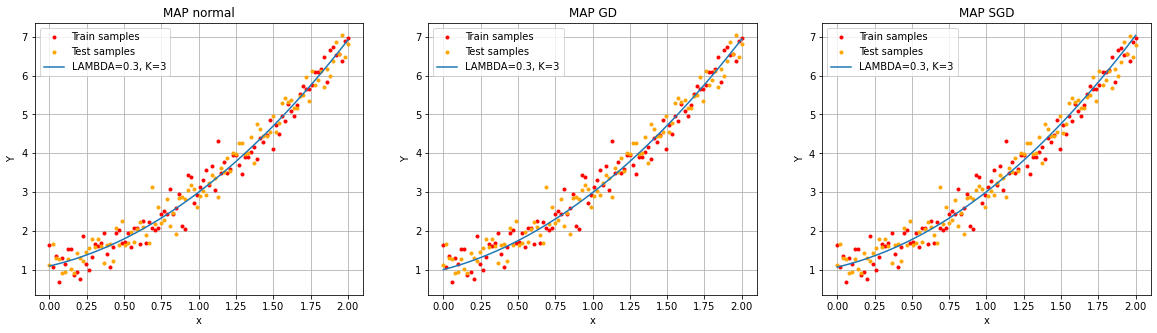

In [202]:
a=0
b=2
N=100
K=3
sigma=0.3
LAMBDA=0.3
theta_true=np.ones((K,))
X = np.linspace(a,b,N)
Y = vander(X,K)@theta_true
Xtest = np.linspace(a,b,N)
Ytest = vander(Xtest,K)@theta_true
Ytest = Ytest + np.random.normal(0,sigma,Ytest.shape)

if mode=='n':
    Y = Y + np.random.normal(0,sigma,Y.shape)
else:
    Y = Y + np.random.poisson(sigma,Y.shape) 
plt.figure(figsize=[20,5])
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.plot(X,Y,'.',c='red',label='Train samples')
    plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
    if c==0:
        Theta = MLE(X,Y,K,'Normal')
        Phi = vander(X,K)
        plt.title('MLE normal')
    elif c==1:
        Theta = MLE(X,Y,K,'GD')
        Phi = vander(X,K)
        plt.title('MLE GD')
    elif c==2:
        Theta = MLE(X,Y,K,'SGD')
        Phi = vander(X,K)
        plt.title('MLE SGD')
    plt.plot(X,Phi@Theta,label='K='+str(K))
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
plt.show()

plt.figure(figsize=[20,5])
for c in range(3):
    plt.subplot(1,3,c+1)
    plt.plot(X,Y,'.',c='red',label='Train samples')
    plt.plot(Xtest,Ytest,'.',c='orange',label='Test samples')
    if c==0:
        Theta = MAP(X,Y,K,LAMBDA,'Normal')
        Phi = vander(X,K)
        plt.title('MAP normal')
    elif c==1:
        Theta = MAP(X,Y,K,LAMBDA,'GD')
        Phi = vander(X,K)
        plt.title('MAP GD')
    elif c==2:
        Theta = MAP(X,Y,K,LAMBDA,'SGD')
        Phi = vander(X,K)
        plt.title('MAP SGD')
    plt.plot(X,Phi@Theta,label='LAMBDA='+str(LAMBDA)+', K='+str(K))
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.grid()
    plt.legend()
plt.show()